# Predictors of Movie Revenue

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>"The Movie Database" (TMDb) has a collection of data on thousands of movies released since 1960.  Revenue adjusted for inflation is included and allows us to search for relationships between other this and other data series. 

In [4]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [5]:
# Reading raw data
df = pd.read_csv('tmdb_data.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,174799923.1,1.385749e+09


### Data Cleaning

In [6]:
#Check for duplicated 'imdb_id'
df.drop_duplicates(subset='imdb_id', keep="last", inplace=True)
df['imdb_id'].duplicated().sum()


0

In [7]:
#Check for duplicated id
df.drop_duplicates(subset='id', keep="last", inplace=True)
df['id'].duplicated().sum()

0

In [8]:
# Removing columns that will not be analyzed.
df = df.drop(['id', "imdb_id", 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date', 'keywords', 'genres'], axis=1)

In [9]:
# Counting non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10856 non-null  float64
 1   runtime       10856 non-null  int64  
 2   vote_count    10856 non-null  int64  
 3   vote_average  10856 non-null  float64
 4   release_year  10856 non-null  int64  
 5   budget_adj    10856 non-null  float64
 6   revenue_adj   10856 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 678.5 KB


In [10]:
# Removing values of 0 from revenue_adj and budget_adj series.
df = df[df.revenue_adj != 0]
df = df[df.budget_adj != 0]

In [11]:
# Checking for any null values
df.isnull().sum()

popularity      0
runtime         0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### What variables are most correlated with adjusted revenue of movie?

In [12]:
# Searching for correlations with revenue_adj
df.corr().revenue_adj

popularity      0.546959
runtime         0.280505
vote_count      0.654688
vote_average    0.266844
release_year   -0.103147
budget_adj      0.570451
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

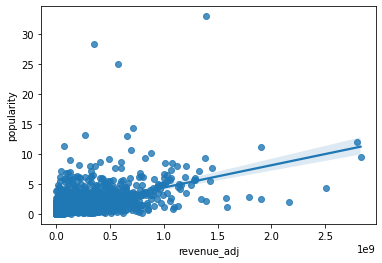

In [13]:
# Visualizing revenue_adj vs popularity.
sns.regplot(x="revenue_adj", y="popularity", data=df);

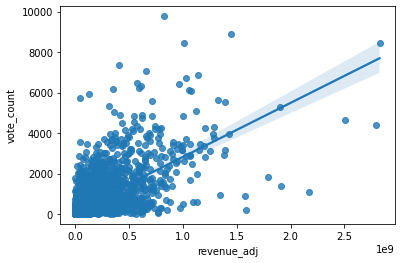

In [14]:
# Visualizing revenue_adj vs vote_count.
sns.regplot(x="revenue_adj", y="vote_count", data=df);

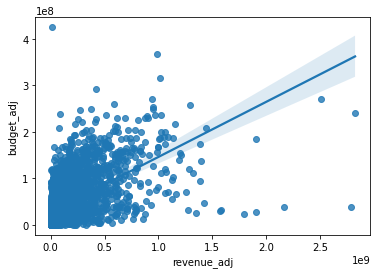

In [15]:
# Visualizing revenue_adj vs budget_adj.
sns.regplot(x="revenue_adj", y="budget_adj", data=df);

##### Adjusted revenue is moderately correlated with popularity, vote count, and adjusted budget.  Correlation with popularity and vote count seem to be self-explanitory since more popular movies and movies with more votes have probably already sold the most tickets thus having higher revenues.  We should look more at the budget association since it is not as related to how many people have seen the movie.

### What is the skewdness of adjusted revenue and adjusted budget?

In [16]:
# Checking distribution of revenue_adj data.
df['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

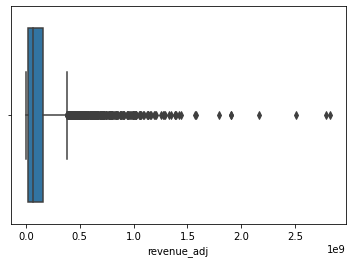

In [17]:
# Visualizing distribution of revenue_adj data.
sns.boxplot(x=df['revenue_adj']);

##### Data has a positive skew.  Does the adjusted revenue and adjusted budget correlation change with the higher budget movies or lower budget movies?

### Does this association change with adjsuted revenue grouped by below and above the median?

In [18]:
# Creating new dataframes for data below and above revenue_adj median.
df_above_median = df[df['revenue_adj'] > df['revenue_adj'].median()]
df_below_median = df[df['revenue_adj'] <= df['revenue_adj'].median()]

In [19]:
# Checking for correlations above revenue_adj median.
df_above_median.corr().revenue_adj

popularity      0.475618
runtime         0.250044
vote_count      0.592577
vote_average    0.284162
release_year   -0.066231
budget_adj      0.459268
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

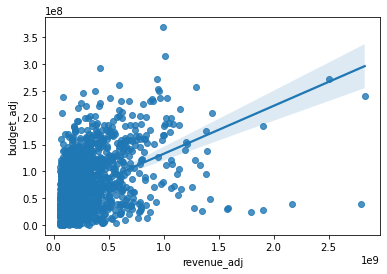

In [20]:
# Visualizing correlations above revenue_adj median.
sns.regplot(x="revenue_adj", y="budget_adj", data=df_above_median);

In [21]:
# Checking for correlations below revenue_adj median.
df_below_median.corr().revenue_adj

popularity      0.249991
runtime         0.117289
vote_count      0.255050
vote_average    0.100111
release_year   -0.156453
budget_adj      0.322772
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

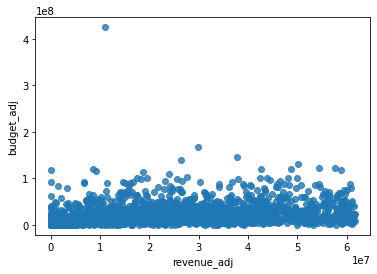

In [22]:
# Visualizing correlations below revenue_adj median.
sns.regplot(x="revenue_adj", y="budget_adj", data=df_below_median);

#####  There is almost no correlation between adjusted revenue and adjusted budget when the adjusted revenue is below the median.

<a id='conclusions'></a>
## Conclusions

> The search for relationships between adjusted revenue did not yield any strong correlations but some moderate ones.  We saw the strongest correlation with vote count, but this does not tell us much since higher vote counts just mean more people saw the movie and bought tickets.  Popularity is a similar measure because according to the TMDB website popularity is accessed by votes, views, and users adding the movie to lists.  This correlation with popularity is not suprising either.  Adjusted budget is an interesting relationship because it is not related to how many people have viewed or are planning to view the movie.  We can see the relationship but when we look at the distribution of data it has many more outliers on the higher adjusted budget side.  When the data is grouped by movies above and below the adjusted revenue median relationship only holds for movies above this median.